In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n_trials = 10000

In [3]:
np.random.seed(24)

# 1

How likely is it that you roll doubles when rolling two dice?

In [4]:
n_dice = 2

# roll two six sided dice n_trials times
rolls = pd.DataFrame(np.random.randint(1, 7, size = (n_trials, n_dice)))
rolls

,0,1
0,3,4
1,1,2
2,2,2
3,5,4
4,5,4
...,...,...
9995,3,2
9996,4,6
9997,2,6
9998,3,6


In [5]:
# for each row check if the first die and second are the same value
doubles = rolls.apply(lambda row: row[0] == row[1], axis = 1)
doubles.mean()

0.1682

# 2

If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [6]:
n_coins = 8

# flip 8 coins n_trials times, 1 is heads, 0 is tails
coin_flips = np.random.choice([1, 0], size = (n_trials, n_coins))
coin_flips

array([[1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [7]:
# sum each row to determine the number of heads flipped
exactly_three_heads = coin_flips.sum(axis = 1) == 3
exactly_three_heads.mean()

0.2169

In [8]:
more_than_three_heads = coin_flips.sum(axis = 1) > 3
more_than_three_heads.mean()

0.6376

# 3

There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [9]:
n_billboards = 2

# generate two billboards n_trials times, 1 is data science, 0 is web dev
billboards = np.random.choice([1, 0, 0, 0], size = (n_trials, n_billboards))
billboards

array([[0, 0],
       [0, 0],
       [0, 1],
       ...,
       [1, 1],
       [0, 0],
       [0, 0]])

In [10]:
both_data_science = billboards.sum(axis = 1) == 2
both_data_science.mean()

0.0636

# 4

Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal)

In [11]:
n_poptarts_restocked = 17
avg_poptarts_purchased = 3
std_dev = 1.5

# Not including Friday
n_days = 4

# generate poptart sells for four days n_trials times
poptarts = np.random.normal(avg_poptarts_purchased, std_dev, size = (n_trials, n_days))
poptarts

array([[3.85160967, 4.1770012 , 2.59854764, 2.09698362],
       [1.35416768, 4.76311892, 2.46677301, 3.97390298],
       [5.38411496, 2.85234855, 3.92069361, 2.64337043],
       ...,
       [2.50923438, 3.29249941, 3.86542271, 3.56482083],
       [2.58388827, 2.6554977 , 3.91222369, 2.68385097],
       [1.91517864, 3.75410944, 2.46106272, 0.84821296]])

In [12]:
# determine how often there is at least one poptart remaining
at_least_one_poptart_remaining = poptarts.sum(axis = 1) <= n_poptarts_restocked - 1
at_least_one_poptart_remaining.mean()

0.9098

# 5

Compare Heights

- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.
- Since you have means and standard deviations, you can use np.random.normal to generate observations.
- If a man and woman are chosen at random, P(woman taller than man)?

In [13]:
avg_height_men = 178
std_dev_men = 8
avg_height_women = 170
std_dev_women = 6

# generate heights for men and women n_trials times
heights_of_men = np.random.normal(avg_height_men, std_dev_men, size = n_trials)
heights_of_women = np.random.normal(avg_height_women, std_dev_women, size = n_trials)

In [14]:
# determine the number of times a woman is taller than a man
women_taller_than_men = heights_of_women > heights_of_men
women_taller_than_men.mean()

0.2145

# 6

When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

What is the probability that we observe an installation issue within the first 150 students that download anaconda?

How likely is it that 450 students all download anaconda without an issue?

In [15]:
# Generate n_students values of 1 or 0 given the probability for a corrupted install
# n_trials times. Return the probability that a given student population had no
# corrupted installs.
def probability_no_corrupted_install(n_students):
    p_corrupted_install = 1 / 250
    anaconda_installs = np.random.choice([1, 0], 
                                         p = [p_corrupted_install, 1 - p_corrupted_install], 
                                         size = (n_trials, n_students))

    corrupted_installs = anaconda_installs.sum(axis = 1) == 0
    return corrupted_installs.mean()

In [16]:
probability_no_corrupted_install(50)

0.8196

In [17]:
probability_no_corrupted_install(100)

0.6667

In [18]:
# Here we need the complement of the probability there are no corrupted installs
# in order to get the probability that there is a corrupted install.
1 - probability_no_corrupted_install(150)

0.44789999999999996

In [19]:
probability_no_corrupted_install(450)

0.1639

# 7

There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

How likely is it that a food truck will show up sometime this week?

In [20]:
# Return the probability that there will be at least one food truck at Travis Park
# within n_days. Generate n_trials number of trials.
def prob_at_least_one_food_truck(n_days):
    probability = 7 / 10
    food_trucks = np.random.choice([1, 0],
                                   p = [probability, 1 - probability],
                                   size = (n_trials, n_days))
    at_least_one_food_truck = food_trucks.sum(axis = 1) >= 1
    return at_least_one_food_truck.mean()

In [21]:
# Probability there are no food trucks in 3 days
1 - prob_at_least_one_food_truck(3)

0.02959999999999996

In [22]:
# Probability there is at least 1 food truck in 7 days
prob_at_least_one_food_truck(7)

0.9997

# 8

If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [23]:
def prob_at_least_one_shared_birthday(n_people):
    birthdays = pd.DataFrame(np.random.randint(0, 365, size = (n_trials, n_people)))
    no_shared_birthday = birthdays.apply(lambda row: len(set(row)) == n_people, axis = 1)
    return 1 - no_shared_birthday.mean()

# def prob_at_least_one_shared_birthday(n_people):
#     birthdays = pd.DataFrame(np.random.randint(0, 365, size = (n_trials, n_people)))
#     at_least_one_shared_birthday = birthdays.nunique(axis = 1) < n_people
#     return at_least_one_shared_birthday.mean()

In [24]:
prob_at_least_one_shared_birthday(23)

0.4969

In [25]:
prob_at_least_one_shared_birthday(20)

0.4113

In [26]:
prob_at_least_one_shared_birthday(40)

0.8928

# Mage Duel

Simulate mage duels to answer who is the more powerful mage?

- Before running simulations, do you have a hypothesis of which mage will win? Do you have a hunch? Write it down. This is your first exercise.

I predict the 6d4 mage will win. My hypothesis is that with more dice there is a greater probability that a larger sum will be rolled on any given duel.

- Simulate 10 mage duels. Is there a clear winner? Run that 10 duel simulation again. Was the answer similar?
- Do the results change much at 100 duels?
- Now, simulate 10,000 mage duels. Is there a clear winner?

In [33]:
def simulate_6d4_rolls(n_trials):
    n_dice = 6
    max_num = 4
    return np.random.randint(1, max_num + 1, size = (n_trials, n_dice)).sum(axis = 1)

def simulate_4d6_rolls(n_trials):
    n_dice = 4
    max_num = 6
    return np.random.randint(1, max_num + 1, size = (n_trials, n_dice)).sum(axis = 1)

In [38]:
def simulate_duels(n_trials):
    mage_6d4 = simulate_6d4_rolls(n_trials)
    mage_4d6 = simulate_4d6_rolls(n_trials)

    mage_6d4_wins = mage_6d4 > mage_4d6
    mage_4d6_wins = mage_4d6 > mage_6d4
    ties = mage_6d4 == mage_4d6

    print(f'Result of {n_trials} duels')
    print(f'6d4 Mage Win Percentage: {mage_6d4_wins.mean()}')
    print(f'4d6 Mage Win Percentage: {mage_4d6_wins.mean()}')
    print(f'Tie Percentage: {ties.mean()}')

In [39]:
simulate_duels(10)

Result of 10 duels
6d4 Mage Win Percentage: 0.5
4d6 Mage Win Percentage: 0.5
Tie Percentage: 0.0


In [40]:
simulate_duels(10)

Result of 10 duels
6d4 Mage Win Percentage: 0.6
4d6 Mage Win Percentage: 0.3
Tie Percentage: 0.1


In [41]:
simulate_duels(100)

Result of 100 duels
6d4 Mage Win Percentage: 0.51
4d6 Mage Win Percentage: 0.43
Tie Percentage: 0.06


In [42]:
simulate_duels(n_trials)

Result of 10000 duels
6d4 Mage Win Percentage: 0.5488
4d6 Mage Win Percentage: 0.3671
Tie Percentage: 0.0841


# Chuck A Luck

Rules:

- The player pays $1 to play and picks a number.

- The House rolls 3 dice at once.

- Payouts:
    - \$3 if all three dice match the chosen number
    - \$2 if exactly two dice match the chosen number
    - \$1 is exactly one of the dice matches the chosen number
    - If none of the dice match the player's chosen number, then the House keeps the $1.

In [48]:
def simulate_chuck_a_luck(n_trials, picked_number):
    n_dice = 3
    simulations = np.random.randint(1, 7, size = (n_trials, n_dice))
    return (simulations == picked_number).sum(axis = 1)

In [69]:
n_trials = 1_000_000
picked_number = 4
simulations = simulate_chuck_a_luck(n_trials, picked_number)

What are your chances of getting an outcome payout of $2?

In [70]:
(simulations == 3).mean()

0.004693

What are your chances of getting an payout of $1?

In [71]:
(simulations == 2).mean()

0.069414

What are your chances of getting a payout of $0?

In [72]:
(simulations == 1).mean()

0.346635

What are your chances of getting a payout of -$1 where you ante up, but don't win anything?

In [73]:
(simulations == 0).mean()

0.579258

What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)

In [78]:
cost = 1
simulations.mean() - cost

-0.5004580000000001

Chart out a histogram of all the outcomes of those 1,000,000 games

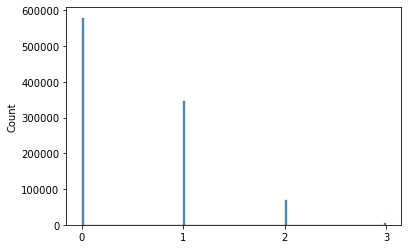

In [75]:
sns.histplot(data = simulations)
plt.xticks(ticks = [0.0, 1.0, 2.0, 3.0], labels = [0, 1, 2, 3]);

Is this really a fair game of 1/6 + 1/6 + 1/6 odds?

This is not a fair game. On any given game the odds are that you are more likely to lose than win.

If you play 1,000,000 games in a row, what are your winnings/losses?

In [79]:
simulations.sum() - n_trials * cost

-500458